In [210]:
%matplotlib inline

import collections
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [211]:
used_car = pd.read_csv("output/used_cars.csv")

In [212]:
used_car.describe()

,year,odometer,latitude,longitude,cylinders,price
count,9306.000000,8.540000e+03,7221.000000,7221.000000,9306.000000,9.306000e+03
mean,2006.368042,1.131937e+05,37.707383,-122.012114,5.641629,1.166607e+04
std,6.215687,1.681794e+05,0.632460,1.603597,1.574441,2.214733e+04
min,1990.000000,0.000000e+00,25.859400,-123.770300,3.000000,5.000000e+02
25%,2002.000000,5.603425e+04,37.372579,-122.357655,4.000000,3.800000e+03
50%,2007.000000,1.020000e+05,37.665800,-122.050873,6.000000,7.900000e+03
75%,2012.000000,1.515530e+05,37.957500,-121.914854,6.000000,1.495600e+04
max,2018.000000,9.659000e+06,47.678310,-73.909900,12.000000,1.588800e+06


In [213]:
used_car['make_model'] = used_car[['make', 'model']].apply(lambda x: ','.join(x), axis=1)
used_car = used_car.dropna(subset=['odometer'])
used_car = used_car.drop(['latitude', 'longitude'], axis=1)
used_car.describe()

,year,odometer,cylinders,price
count,8540.000000,8.540000e+03,8540.000000,8.540000e+03
mean,2006.592857,1.131937e+05,5.631616,1.197607e+04
std,6.168301,1.681794e+05,1.569227,2.288424e+04
min,1990.000000,0.000000e+00,3.000000,5.000000e+02
25%,2002.000000,5.603425e+04,4.000000,4.000000e+03
50%,2007.000000,1.020000e+05,6.000000,8.000000e+03
75%,2012.000000,1.515530e+05,6.000000,1.500000e+04
max,2018.000000,9.659000e+06,12.000000,1.588800e+06


In [214]:
# convert string into number

In [215]:
make_mapping = {make: i for i, make in enumerate(sorted(used_car['make'].unique()))}
make_mapping

{'acura': 0,
 'aston-martin': 1,
 'audi': 2,
 'bentley': 3,
 'bmw': 4,
 'buick': 5,
 'cadillac': 6,
 'chevrolet': 7,
 'chrysler': 8,
 'daihatsu': 9,
 'dodge': 10,
 'ferrari': 11,
 'fiat': 12,
 'ford': 13,
 'geo': 14,
 'gmc': 15,
 'hino': 16,
 'honda': 17,
 'hummer': 18,
 'hyundai': 19,
 'infiniti': 20,
 'international': 21,
 'isuzu': 22,
 'jaguar': 23,
 'jeep': 24,
 'kia': 25,
 'lamborghini': 26,
 'land-rover': 27,
 'lexus': 28,
 'lincoln': 29,
 'lotus': 30,
 'maserati': 31,
 'maybach': 32,
 'mazda': 33,
 'mclaren': 34,
 'mercedes-benz': 35,
 'mercury': 36,
 'mini': 37,
 'mitsubishi': 38,
 'nissan': 39,
 'oldsmobile': 40,
 'plymouth': 41,
 'pontiac': 42,
 'porsche': 43,
 'ram': 44,
 'rolls-royce': 45,
 'saab': 46,
 'saturn': 47,
 'scion': 48,
 'smart': 49,
 'subaru': 50,
 'suzuki': 51,
 'tesla': 52,
 'toyota': 53,
 'volkswagen': 54,
 'volvo': 55}

In [216]:
model_mapping = {make_model: i for i, make_model in enumerate(sorted(used_car['make_model'].unique()))}
sorted(model_mapping.keys())

['acura,cl',
 'acura,ilx',
 'acura,integra',
 'acura,legend',
 'acura,mdx',
 'acura,nsx',
 'acura,rdx',
 'acura,rsx',
 'acura,tl',
 'acura,tlx',
 'acura,tsx',
 'acura,vigor',
 'aston-martin,vantage',
 'audi,a3',
 'audi,a4',
 'audi,a5',
 'audi,a6',
 'audi,a7',
 'audi,allroad',
 'audi,cabriolet',
 'audi,q5',
 'audi,q7',
 'audi,quattro',
 'audi,r8',
 'audi,rs4',
 'audi,rs5',
 'audi,s3',
 'audi,s4',
 'audi,s5',
 'audi,s7',
 'audi,sq5',
 'audi,tt',
 'audi,v8',
 'bentley,continental',
 'bmw,128i',
 'bmw,135i',
 'bmw,228i',
 'bmw,3-series',
 'bmw,320i',
 'bmw,323i',
 'bmw,325',
 'bmw,325ci',
 'bmw,325i',
 'bmw,325xi',
 'bmw,328d',
 'bmw,328i',
 'bmw,328xi',
 'bmw,330',
 'bmw,330ci',
 'bmw,330i',
 'bmw,330xi',
 'bmw,335d',
 'bmw,335i',
 'bmw,335xi',
 'bmw,428i',
 'bmw,5-series',
 'bmw,525',
 'bmw,525i',
 'bmw,528i',
 'bmw,530',
 'bmw,530i',
 'bmw,530xi',
 'bmw,535d',
 'bmw,535i',
 'bmw,535xi',
 'bmw,540i',
 'bmw,545i',
 'bmw,550i',
 'bmw,6-series',
 'bmw,600',
 'bmw,640i',
 'bmw,645',
 'bmw,65

In [217]:
title_status_mapping = {title_status: i for i, title_status in enumerate(sorted(used_car['title_status'].unique()))}
title_status_mapping

{'clean': 0, 'lien': 1, 'missing': 2, 'parts': 3, 'rebuilt': 4, 'salvage': 5}

In [218]:
drive_mapping = {drive: i for i, drive in enumerate(sorted(used_car['drive'].unique()))}
drive_mapping

{'4wd': 0, 'fwd': 1, 'rwd': 2}

In [219]:
fuel_mapping = {fuel: i for i, fuel in enumerate(sorted(used_car['fuel'].unique()))}
fuel_mapping

{'diesel': 0, 'electric': 1, 'gas': 2, 'hybrid': 3}

In [220]:
transmission_mapping = {transmission: i for i, transmission in enumerate(sorted(used_car['transmission'].unique()))}
transmission_mapping

{'automatic': 0, 'manual': 1}

In [221]:
size_mapping = {size: i for i, size in enumerate(sorted(used_car['size'].unique()))}
size_mapping

{'compact': 0, 'full-size': 1, 'mid-size': 2, 'sub-compact': 3}

In [222]:
condition_mapping = {condition: i for i, condition in enumerate(sorted(used_car['condition'].unique()))}
condition_mapping

{'excellent': 0, 'fair': 1, 'good': 2, 'like new': 3, 'new': 4, 'salvage': 5}

In [223]:
category_mapping = {x_category: i for i, x_category in enumerate(sorted(used_car['category'].unique()))}
category_mapping.keys()

[nan,
 'wagon',
 'van',
 'bus',
 'offroad',
 'coupe',
 'SUV',
 'pickup',
 'truck',
 'mini-van',
 'sedan',
 'convertible',
 'hatchback']

In [224]:
color_mapping = {color: i for i, color in enumerate(sorted(used_car['color'].unique()))}
color_mapping.keys()

['blue',
 'brown',
 'purple',
 'grey',
 'yellow',
 'custom',
 'black',
 'orange',
 'green',
 'white',
 'silver',
 'red']

In [225]:
used_car['title_status'] = used_car['title_status'].map(title_status_mapping)
used_car['color'] = used_car['color'].map(color_mapping)
used_car['category'] = used_car['category'].map(category_mapping)
used_car['size'] = used_car['size'].map(size_mapping)
used_car['condition'] = used_car['condition'].map(condition_mapping)
used_car['dealer'] = used_car['dealer'].apply(int)
used_car['fuel'] = used_car['fuel'].map(fuel_mapping)
used_car['drive'] = used_car['drive'].map(drive_mapping)
used_car['transmission'] = used_car['transmission'].map(transmission_mapping)
used_car['make_model'] = used_car['make_model'].map(model_mapping)
used_car['make_name'] = used_car['make']
used_car['make'] = used_car['make'].map(make_mapping)
used_car['model_name'] = used_car['model']
used_car['model'] = used_car['make_model']

#std_scaler = preprocessing.StandardScaler()
#x = used_car['odometer'].values.reshape(-1, 1) #returns a numpy array
#x_scaled = std_scaler.fit_transform(x)
#used_car['odometer'] = pd.DataFrame(x_scaled)

In [226]:
########## Add Feature #################

In [227]:
# mileage per year
max_year = used_car['year'].max() + 1
used_car['miles_per_year'] = used_car['odometer'].astype('float') / (max_year - used_car['year'])

In [228]:
########## Train and Test Data #########

In [229]:
mask = np.random.rand(len(used_car)) < 0.7

In [230]:
train = used_car[mask]
test = used_car[~mask]
print('train: %d, test: %d' % (len(train), len(test)))

train: 5963, test: 2577


In [231]:
##########    Debug   ################

In [232]:
df = train[(train['make_name'] == 'nissan') & (train['model_name'] == 'altima')][['year', 'make_name', 'model_name', 'miles_per_year', 'odometer', 'dealer', 'price', 'color', 'condition', 'size', 'fuel', 'drive', 'title_status', 'post_url']]
df.sort_values(['year', 'miles_per_year', 'price'], ascending=True)

,year,make_name,model_name,miles_per_year,odometer,dealer,price,color,condition,size,fuel,drive,title_status,post_url
4688,1994,nissan,altima,5840.000000,146000.0,0,850,1,2,2,2,1,0,https://sfbay.craigslist.org/eby/cto/d/94-niss...
5273,1998,nissan,altima,6666.666667,140000.0,0,2500,9,2,0,2,1,0,https://sfbay.craigslist.org/pen/cto/d/1998-ni...
7356,1998,nissan,altima,12567.095238,263909.0,0,2500,2,0,2,2,1,0,https://sfbay.craigslist.org/nby/cto/d/1998-ni...
701,1999,nissan,altima,8650.000000,173000.0,0,1900,5,2,0,2,1,0,https://sfbay.craigslist.org/sby/cto/d/1999-ni...
7529,2000,nissan,altima,6473.684211,123000.0,0,3550,3,0,2,2,1,0,https://sfbay.craigslist.org/pen/cto/d/2000-ni...
7391,2000,nissan,altima,9736.842105,185000.0,0,600,2,2,0,2,2,5,https://sfbay.craigslist.org/eby/cto/d/2000-al...
5512,2001,nissan,altima,2641.555556,47548.0,0,4500,9,2,2,2,1,0,https://sfbay.craigslist.org/pen/cto/d/2001-ni...
5680,2001,nissan,altima,4911.111111,88400.0,0,4200,9,0,0,2,1,0,https://sfbay.craigslist.org/sby/cto/d/nissan-...
3079,2003,nissan,altima,11437.500000,183000.0,0,2500,5,2,1,2,1,5,https://sfbay.craigslist.org/eby/cto/d/2003-al...
64,2005,nissan,altima,5142.857143,72000.0,0,3950,4,2,2,2,1,5,https://sfbay.craigslist.org/eby/cto/d/2005-ni...


In [233]:
########## Statistic Method ##########

In [234]:
# remove outliers
def remove_outliers(df, fields, k=3):
    if not isinstance(fields, list):
        fields = [fields]
    for field in fields:
        if isinstance(df, pd.DataFrame):
            df = df[np.abs(df[field] - df[field].mean()) <= (k * df[field].std())]
        elif isinstance(df, pd.Series):
            df = df[((df - df.mean()).abs() <= k * df.std())]
    return df

In [235]:
########## Data Visualization #########

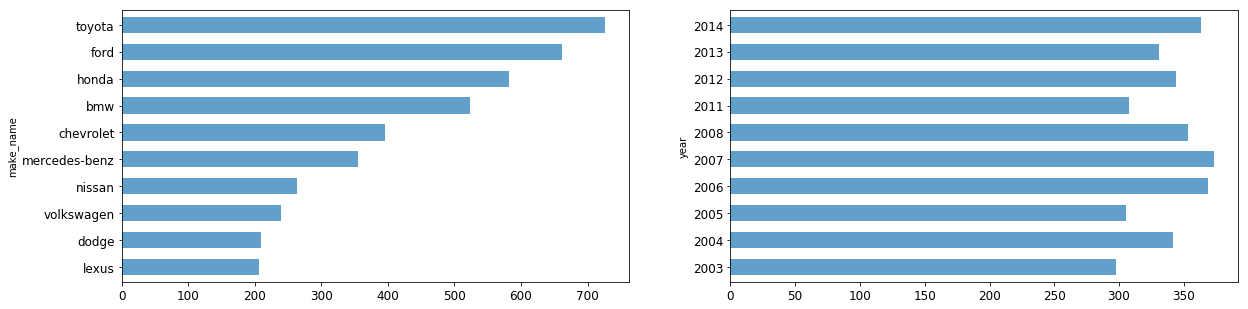

In [236]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
top10_make = train.groupby(['make_name'])['price'].count().nlargest(10).sort_values()
top10_make.plot.barh(alpha=0.7, fontsize=12, width=0.6)
plt.subplot(122)
top10_year = train.groupby(['year'])['price'].count().nlargest(10).sort_index()
top10_year.plot.barh(alpha=0.7, fontsize=12, width=0.6)
plt.show()

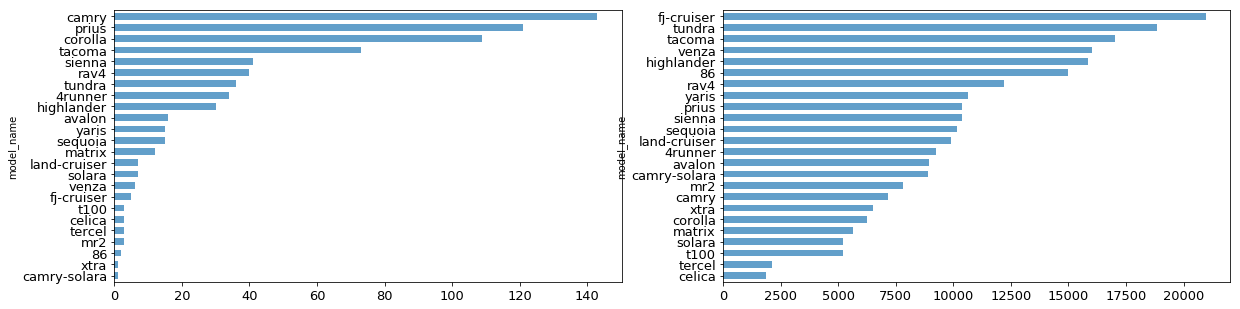

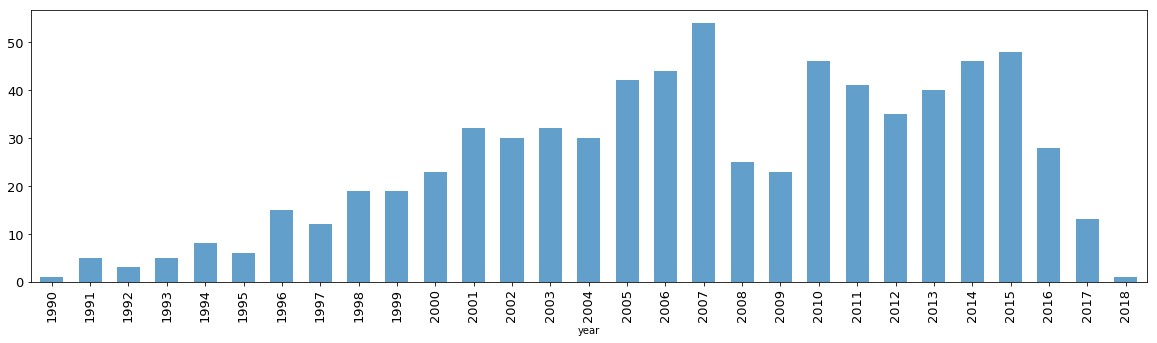

In [237]:
train_toyota = train[train['make_name'] == 'toyota']
plt.figure(figsize=(20, 5))
plt.subplot(121)
model_count = train_toyota.groupby(['model_name'])['price'].count().sort_values()
model_count.plot.barh(alpha=0.7, fontsize=13, width=0.6)
plt.subplot(122)
model_price = train_toyota.groupby(['model_name'])['price'].mean().sort_values()
model_price.plot.barh(alpha=0.7, fontsize=13, width=0.6)
plt.figure(figsize=(20, 5))
year_count = train_toyota.groupby(['year'])['price'].count().sort_index()
year_count.plot.bar(alpha=0.7, fontsize=13, width=0.6)

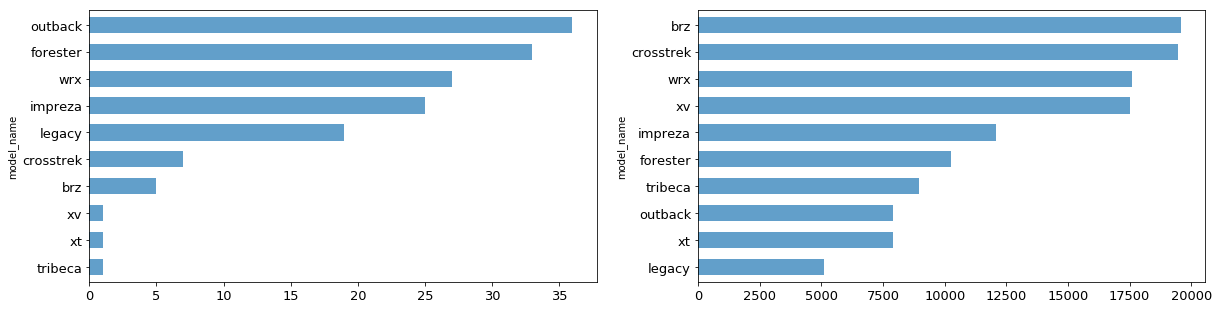

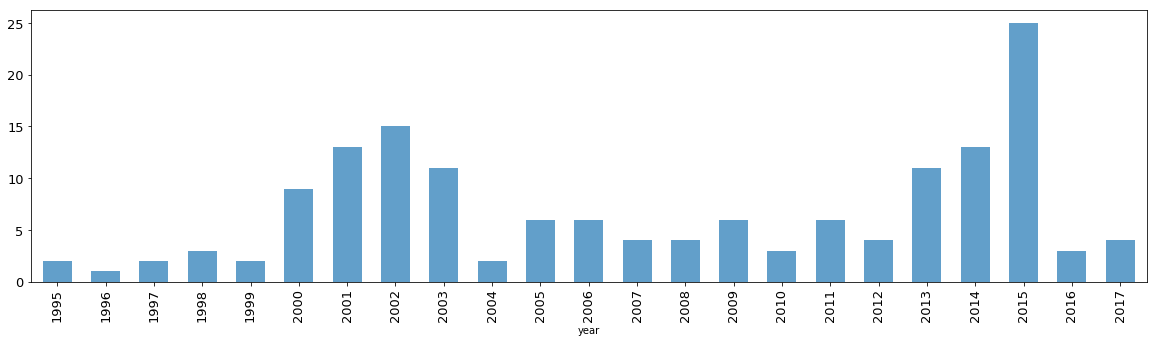

In [238]:
train_subaru = train[train['make_name'] == 'subaru']
plt.figure(figsize=(20, 5))
plt.subplot(121)
model_count = train_subaru.groupby(['model_name'])['price'].count().sort_values()
model_count.plot.barh(alpha=0.7, fontsize=13, width=0.6)
plt.subplot(122)
model_price = train_subaru.groupby(['model_name'])['price'].mean().sort_values()
model_price.plot.barh(alpha=0.7, fontsize=13, width=0.6)
plt.figure(figsize=(20, 5))
year_count = train_subaru.groupby(['year'])['price'].count().sort_index()
year_count.plot.bar(alpha=0.7, fontsize=13, width=0.6)

In [239]:
train_corr = train[['year', 'price', 'miles_per_year', 'odometer', 'color', 'category', 'condition', 'size', 'title_status', 'dealer', 'model', 'make', 'cylinders', 'drive', 'fuel', 'transmission']]
train_new_corr = remove_outliers(train_corr, ['price', 'miles_per_year'])
train_new_corr.corr()

,year,price,miles_per_year,odometer,color,category,condition,size,title_status,dealer,model,make,cylinders,drive,fuel,transmission
year,1.000000,0.626096,0.164433,-0.599961,-0.005020,0.106912,-0.138391,0.049693,-0.012983,0.359942,0.013790,0.017660,-0.157672,-0.075491,0.034732,-0.166574
price,0.626096,1.000000,-0.094273,-0.527712,-0.014321,0.102210,-0.107493,0.067533,-0.115652,0.300682,-0.073077,-0.072480,0.211527,-0.074495,-0.178048,-0.038408
miles_per_year,0.164433,-0.094273,1.000000,0.594813,0.003293,0.042354,-0.044048,0.044732,-0.063467,0.090654,0.013563,0.012305,-0.012701,-0.088466,-0.048217,-0.099391
odometer,-0.599961,-0.527712,0.594813,1.000000,-0.002686,-0.063748,0.102451,-0.009144,-0.019375,-0.236019,0.013359,0.012525,0.099959,-0.024427,-0.073506,0.054369
color,-0.005020,-0.014321,0.003293,-0.002686,1.000000,0.010374,-0.000143,-0.011747,-0.019345,0.031130,0.034431,0.025729,-0.010576,0.027733,-0.066162,-0.016356
category,0.106912,0.102210,0.042354,-0.063748,0.010374,1.000000,-0.081333,0.064930,-0.072915,0.451413,-0.002756,-0.000090,-0.019273,0.025031,-0.048685,-0.026975
condition,-0.138391,-0.107493,-0.044048,0.102451,-0.000143,-0.081333,1.000000,-0.048887,0.133414,-0.188825,-0.012253,-0.015293,-0.002371,-0.006306,-0.013369,0.045057
size,0.049693,0.067533,0.044732,-0.009144,-0.011747,0.064930,-0.048887,1.000000,-0.026557,0.108764,-0.062927,-0.060554,0.100697,-0.021930,0.001481,-0.134169
title_status,-0.012983,-0.115652,-0.063467,-0.019375,-0.019345,-0.072915,0.133414,-0.026557,1.000000,-0.144281,0.033600,0.036799,-0.069787,0.035675,0.036710,0.023312
dealer,0.359942,0.300682,0.090654,-0.236019,0.031130,0.451413,-0.188825,0.108764,-0.144281,1.000000,-0.019156,-0.023951,-0.016216,-0.009324,0.008996,-0.085908


In [240]:
train_toyota_corr = train[train['make_name'] == 'toyota'][['year', 'price', 'miles_per_year', 'odometer', 'color', 'category', 'condition', 'size', 'title_status', 'dealer', 'model', 'make', 'cylinders', 'drive', 'fuel', 'transmission']]
train_toyota_new_corr = remove_outliers(train_toyota_corr, ['price', 'miles_per_year'])
train_toyota_new_corr.corr()

,year,price,miles_per_year,odometer,color,category,condition,size,title_status,dealer,model,make,cylinders,drive,fuel,transmission
year,1.000000,0.711815,0.074472,-0.669406,0.090255,0.065756,-0.131020,0.008744,0.014858,0.290156,0.192339,NaN,-0.158916,0.002268,0.260784,-0.134240
price,0.711815,1.000000,-0.147653,-0.600744,0.087020,0.030294,-0.162115,0.130209,-0.149806,0.326259,0.306976,NaN,0.226282,-0.157821,0.086099,-0.012146
miles_per_year,0.074472,-0.147653,1.000000,0.606973,-0.007822,-0.026514,-0.090409,0.026201,-0.039374,0.061618,0.085953,NaN,0.020756,-0.019545,0.107116,-0.048072
odometer,-0.669406,-0.600744,0.606973,1.000000,-0.090712,-0.091834,0.070863,0.007695,-0.043825,-0.186957,-0.078125,NaN,0.160223,-0.009190,-0.122000,0.077907
color,0.090255,0.087020,-0.007822,-0.090712,1.000000,0.082375,-0.043772,-0.051985,-0.065902,0.100547,0.082267,NaN,-0.010485,0.087756,0.052091,-0.037598
category,0.065756,0.030294,-0.026514,-0.091834,0.082375,1.000000,-0.068133,0.020417,-0.071634,0.395219,0.002002,NaN,0.008583,0.052335,-0.015687,-0.024000
condition,-0.131020,-0.162115,-0.090409,0.070863,-0.043772,-0.068133,1.000000,-0.064946,0.118583,-0.283094,-0.114023,NaN,-0.026564,0.017784,-0.083526,-0.018231
size,0.008744,0.130209,0.026201,0.007695,-0.051985,0.020417,-0.064946,1.000000,-0.073921,0.141071,-0.012214,NaN,0.211191,-0.110197,-0.051195,-0.044688
title_status,0.014858,-0.149806,-0.039374,-0.043825,-0.065902,-0.071634,0.118583,-0.073921,1.000000,-0.186799,0.001606,NaN,-0.119238,0.118966,0.049040,0.057935
dealer,0.290156,0.326259,0.061618,-0.186957,0.100547,0.395219,-0.283094,0.141071,-0.186799,1.000000,0.159244,NaN,0.025128,-0.041089,0.105095,-0.063365


In [241]:
train_toyota_camry_corr = train[(train['make_name'] == 'toyota') & (train['model_name'] == 'camry')][['year', 'price', 'miles_per_year', 'odometer', 'color', 'category', 'condition', 'size', 'title_status', 'dealer', 'model', 'make', 'cylinders', 'drive', 'fuel', 'transmission']]
train_toyota_camry_1_5_corr = remove_outliers(train_toyota_camry_corr, ['price', 'miles_per_year'], 1.5)
train_toyota_camry_3_corr = remove_outliers(train_toyota_camry_corr, ['price', 'miles_per_year'], 3)

In [242]:
train_toyota_camry_1_5_corr.corr()['price']

year              0.882265
price             1.000000
miles_per_year    0.009488
odometer         -0.792474
color             0.016818
category          0.227026
condition        -0.279684
size             -0.019620
title_status      0.030989
dealer            0.376685
model                  NaN
make                   NaN
cylinders        -0.132912
drive            -0.063902
fuel              0.309056
transmission     -0.114044
Name: price, dtype: float64

In [243]:
train_toyota_camry_3_corr.corr()['price']

year              0.882726
price             1.000000
miles_per_year   -0.258767
odometer         -0.784473
color            -0.041656
category          0.160227
condition         0.071764
size             -0.088214
title_status     -0.019920
dealer            0.249158
model                  NaN
make                   NaN
cylinders        -0.200153
drive            -0.092270
fuel              0.259766
transmission     -0.098597
Name: price, dtype: float64

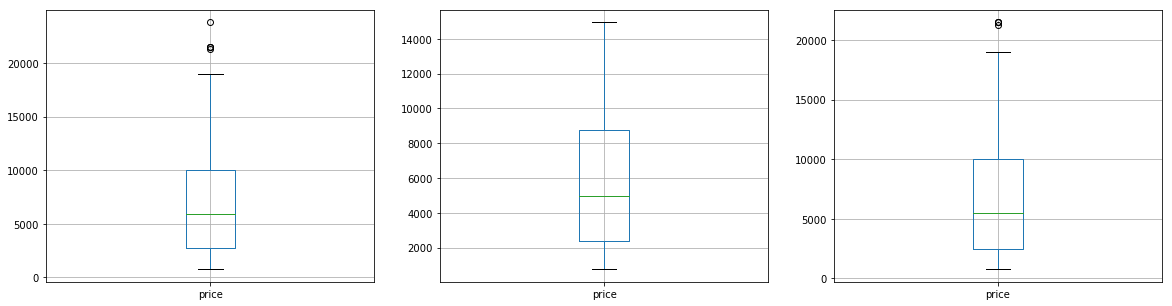

In [244]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
train_toyota_camry_corr['price'].to_frame().boxplot()
plt.subplot(132)
train_toyota_camry_1_5_corr['price'].to_frame().boxplot()
plt.subplot(133)
train_toyota_camry_3_corr['price'].to_frame().boxplot()
plt.show()

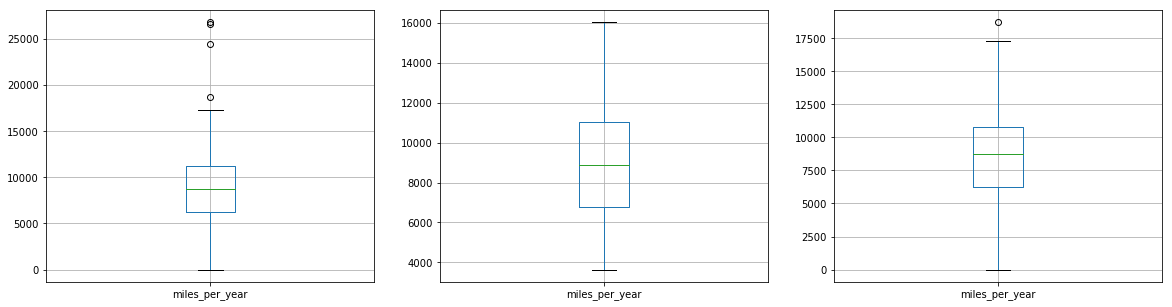

In [245]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
train_toyota_camry_corr['miles_per_year'].to_frame().boxplot()
plt.subplot(132)
train_toyota_camry_1_5_corr['miles_per_year'].to_frame().boxplot()
plt.subplot(133)
train_toyota_camry_3_corr['miles_per_year'].to_frame().boxplot()
plt.show()

In [246]:
########## Feature Selection ##########

In [247]:
from sklearn.feature_selection import SelectKBest, f_classif

def make_model_select(X, make, model):
    fields = ['year', 'price', 'miles_per_year', 'odometer', 'color', 'category', 'condition', 'size', 'title_status', 'dealer', 'model', 'make', 'cylinders', 'drive', 'fuel']
    return X[(X['make_name'] == make) & (X['model_name'] == model)][fields]

# feature select function
def feature_select(train_data, predictors):
    # 特征选择
    selector = SelectKBest(f_classif, k=5)
    selector.fit(train_data[predictors], train_data['price'])

    # 得到每个特征列的p值，再转换为交叉验证得分
    scores = -np.log10(selector.pvalues_)

    # 绘制得分图像，观察哪个特征是坠好的
    plt.bar(range(len(predictors)), scores)
    plt.xticks(range(len(predictors)), predictors, rotation='vertical')
    plt.show()

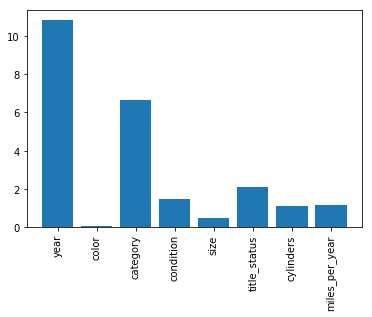

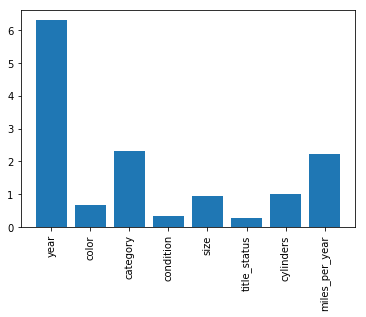

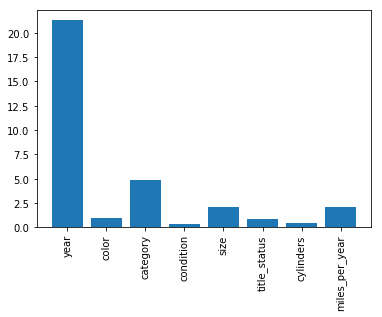

/home/vagrant/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


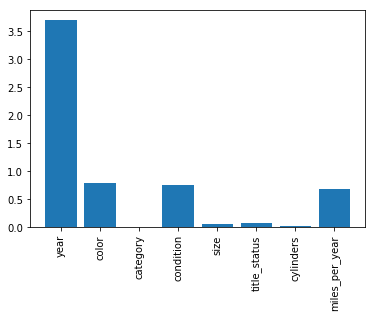

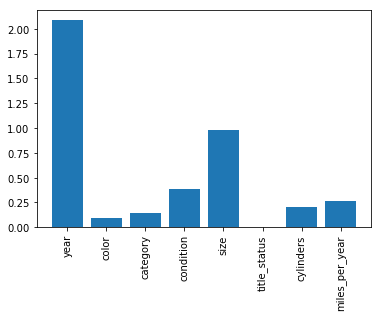

In [248]:
predictors = ['year', 'color', 'category', 'condition', 'size', 'title_status', 'cylinders', 'miles_per_year']

train_toyota_camry = make_model_select(train, 'toyota', 'camry')
feature_select(train_toyota_camry, predictors)

train_toyota_prius = make_model_select(train, 'toyota', 'prius')
feature_select(train_toyota_prius, predictors)

train_honda_accord = make_model_select(train, 'honda', 'accord')
feature_select(train_honda_accord, predictors)

train_nissan_altima = make_model_select(train, 'nissan', 'altima')
feature_select(train_nissan_altima, predictors)

train_volkswagen_passat = make_model_select(train, 'volkswagen', 'passat')
feature_select(train_volkswagen_passat, predictors)

In [249]:
########## Linear Regression ##########

In [250]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

MIN_NUM = 20
TOP_NUM = 25
predictors = ['year', 'dealer', 'category', 'size', 'miles_per_year', 'title_status', 'condition', 'cylinders']
makes = train['make_name'].unique()
models = train['model_name'].unique()

result = []

for make in makes:
    for model in models:
        train_make_model = train[(train['make_name'] == make) & (train['model_name'] == model)][['price'] + predictors]
        train_make_model = remove_outliers(train_make_model, 'price')
        if len(train_make_model) > MIN_NUM:
            alg = LinearRegression()
            scores = cross_val_score(alg, train_make_model[predictors], train_make_model['price'], cv=3)
            result.append((make, model, len(train_make_model), scores.mean()))

for make, model, size, accurancy in sorted(result, key=lambda x: x[0], reverse=True)[:TOP_NUM]:
    print("make: %s, model: %s, size: %d, accurancy: %f" % (make, model, size, accurancy))

make: volkswagen, model: jetta, size: 61, accurancy: -0.957025
make: volkswagen, model: gti, size: 25, accurancy: 0.745251
make: volkswagen, model: passat, size: 27, accurancy: 0.310659
make: volkswagen, model: beetle, size: 25, accurancy: -0.268751
make: volkswagen, model: golf, size: 23, accurancy: 0.476209
make: toyota, model: tacoma, size: 73, accurancy: 0.909192
make: toyota, model: camry, size: 142, accurancy: 0.823323
make: toyota, model: corolla, size: 109, accurancy: 0.779941
make: toyota, model: prius, size: 121, accurancy: 0.824058
make: toyota, model: 4runner, size: 33, accurancy: -0.286106
make: toyota, model: tundra, size: 36, accurancy: 0.583549
make: toyota, model: sienna, size: 41, accurancy: 0.692002
make: toyota, model: rav4, size: 40, accurancy: -16.018346
make: toyota, model: highlander, size: 30, accurancy: 0.905408
make: subaru, model: forester, size: 33, accurancy: 0.557443
make: subaru, model: outback, size: 36, accurancy: -0.307420
make: subaru, model: wrx, si

In [251]:
########### Random Forest ############

In [252]:
from sklearn.ensemble import RandomForestRegressor

MIN_NUM = 20
TOP_NUM = 25
predictors = ['year', 'dealer', 'category', 'condition', 'title_status', 'transmission', 'size', 'miles_per_year']
makes = train['make_name'].unique()
models = train['model_name'].unique()

result = []

for make in makes:
    for model in models:
        train_make_model = train[(train['make_name'] == make) & (train['model_name'] == model)][['price'] + predictors]
        train_make_model = remove_outliers(train_make_model, 'price')
        if len(train_make_model) > MIN_NUM:
            # n_estimators：决策树的数量
            # min_samples_split：单个分叉包含的最小行数
            # min_samples_leaf：单个叶节点的最小样本数量
            alg = RandomForestRegressor(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
            scores = cross_val_score(alg, train_make_model[predictors], train_make_model['price'], cv=3)
            result.append((make, model, len(train_make_model), scores.mean()))

for make, model, size, accurancy in sorted(result, key=lambda x: x[0], reverse=True)[:TOP_NUM]:
    print("make: %s, model: %s, size: %d, accurancy: %f" % (make, model, size, accurancy))

make: volkswagen, model: jetta, size: 61, accurancy: 0.631257
make: volkswagen, model: gti, size: 25, accurancy: 0.811473
make: volkswagen, model: passat, size: 27, accurancy: 0.763398
make: volkswagen, model: beetle, size: 25, accurancy: 0.776623
make: volkswagen, model: golf, size: 23, accurancy: 0.693605
make: toyota, model: tacoma, size: 73, accurancy: 0.839253
make: toyota, model: camry, size: 142, accurancy: 0.893745
make: toyota, model: corolla, size: 109, accurancy: 0.814540
make: toyota, model: prius, size: 121, accurancy: 0.858332
make: toyota, model: 4runner, size: 33, accurancy: 0.756243
make: toyota, model: tundra, size: 36, accurancy: 0.622765
make: toyota, model: sienna, size: 41, accurancy: 0.655084
make: toyota, model: rav4, size: 40, accurancy: 0.838568
make: toyota, model: highlander, size: 30, accurancy: 0.845138
make: subaru, model: forester, size: 33, accurancy: 0.848287
make: subaru, model: outback, size: 36, accurancy: 0.507017
make: subaru, model: wrx, size: 27

In [253]:
########### Gradient Boosting ###########

In [254]:
from sklearn.ensemble import GradientBoostingRegressor

MIN_NUM = 20
TOP_NUM = 25
predictors = ['year', 'dealer', 'category', 'condition', 'title_status', 'transmission', 'size', 'miles_per_year']
makes = train['make_name'].unique()
models = train['model_name'].unique()

result = []

for make in makes:
    for model in models:
        train_make_model = train[(train['make_name'] == make) & (train['model_name'] == model)][['price'] + predictors]
        train_make_model = remove_outliers(train_make_model, 'price')
        if len(train_make_model) > MIN_NUM:
            alg = GradientBoostingRegressor(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
            scores = cross_val_score(alg, train_make_model[predictors], train_make_model['price'], cv=3)
            result.append((make, model, len(train_make_model), scores.mean()))

for make, model, size, accurancy in sorted(result, key=lambda x: x[0], reverse=True)[:TOP_NUM]:
    print("make: %s, model: %s, size: %d, accurancy: %f" % (make, model, size, accurancy))

make: volkswagen, model: jetta, size: 61, accurancy: 0.491208
make: volkswagen, model: gti, size: 25, accurancy: 0.842732
make: volkswagen, model: passat, size: 27, accurancy: 0.868305
make: volkswagen, model: beetle, size: 25, accurancy: 0.528212
make: volkswagen, model: golf, size: 23, accurancy: 0.756877
make: toyota, model: tacoma, size: 73, accurancy: 0.847320
make: toyota, model: camry, size: 142, accurancy: 0.900884
make: toyota, model: corolla, size: 109, accurancy: 0.839222
make: toyota, model: prius, size: 121, accurancy: 0.878566
make: toyota, model: 4runner, size: 33, accurancy: 0.761104
make: toyota, model: tundra, size: 36, accurancy: 0.490137
make: toyota, model: sienna, size: 41, accurancy: 0.550530
make: toyota, model: rav4, size: 40, accurancy: 0.802794
make: toyota, model: highlander, size: 30, accurancy: 0.808797
make: subaru, model: forester, size: 33, accurancy: 0.829651
make: subaru, model: outback, size: 36, accurancy: 0.713758
make: subaru, model: wrx, size: 27

In [255]:
########### Stacking ###########

In [256]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


MIN_NUM = 20
TOP_NUM = 25
makes = train['make_name'].unique()
models = train['model_name'].unique()

possible_features = ['price', 'fuel', 'year', 'dealer', 'category', 'condition', 'title_status', 'transmission', 'size', 'miles_per_year']

algorithms = [
    [GradientBoostingRegressor(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2),
     ['year', 'dealer', 'category', 'condition', 'title_status', 'transmission', 'miles_per_year']],
    [LinearRegression(), ['year', 'dealer', 'fuel', 'miles_per_year']]
]

result = []

kf = KFold(random_state=1) # always use seed 1 to avoid difference between different execution

for make in makes:
    for model in models:
        predictions = []
        train_make_model = train[(train['make_name'] == make) & (train['model_name'] == model)][possible_features]
        train_make_model = remove_outliers(train_make_model, 'price')
        if len(train_make_model) > MIN_NUM:
            for X_train, y_test in kf.split(range(train_make_model.shape[0])):
                train_target = train_make_model['price'].iloc[X_train]
                full_test_predictions = []
                # 对每个交叉验证分组，分别使用两种算法进行分类
                for alg, predictors in algorithms:
                    # 用训练集拟合算法
                    alg.fit(train_make_model[predictors].iloc[X_train,:], train_target)
                    test_predictions = alg.predict(train_make_model[predictors].iloc[y_test,:])
                    full_test_predictions.append(test_predictions)
                # 对两个预测结果取平均值
                test_predictions = (full_test_predictions[0]*3 + full_test_predictions[1]) / 4
                predictions.append(test_predictions)
            predictions = np.concatenate(predictions, axis=0)
            accuracy = r2_score(predictions, train_make_model["price"].values)
            result.append((make, model, len(train_make_model), accuracy))

for make, model, size, accurancy in sorted(result, key=lambda x: x[0], reverse=True)[:TOP_NUM]:
    print("make: %s, model: %s, size: %d, accurancy: %f" % (make, model, size, accurancy))

make: volkswagen, model: jetta, size: 61, accurancy: 0.491846
make: volkswagen, model: gti, size: 25, accurancy: 0.863465
make: volkswagen, model: passat, size: 27, accurancy: 0.900708
make: volkswagen, model: beetle, size: 25, accurancy: 0.702694
make: volkswagen, model: golf, size: 23, accurancy: 0.630671
make: toyota, model: tacoma, size: 73, accurancy: 0.833599
make: toyota, model: camry, size: 142, accurancy: 0.896432
make: toyota, model: corolla, size: 109, accurancy: 0.852738
make: toyota, model: prius, size: 121, accurancy: 0.858490
make: toyota, model: 4runner, size: 33, accurancy: 0.607257
make: toyota, model: tundra, size: 36, accurancy: 0.478599
make: toyota, model: sienna, size: 41, accurancy: 0.401606
make: toyota, model: rav4, size: 40, accurancy: 0.485966
make: toyota, model: highlander, size: 30, accurancy: 0.894437
make: subaru, model: forester, size: 33, accurancy: 0.928172
make: subaru, model: outback, size: 36, accurancy: 0.788780
make: subaru, model: wrx, size: 27